# Lab 6

This lab connects all the pieces involved in training feed-forward fully connected neural networks. You will run a full set of experiments to explore different hyperparameters and hidden layer sizes for both the MNIST and FASHION_MNIST datasets, and report your findings.

In [2]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

## Datasets


### Fashion MNIST

We load the fashion_mnist dataset as before.

Label: t-shirt


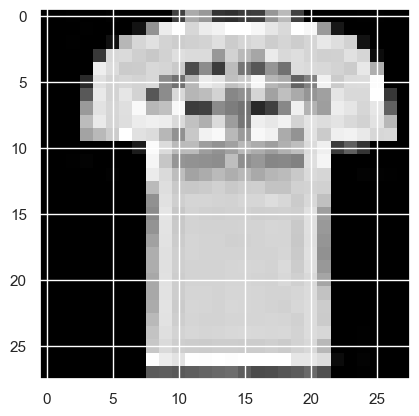

In [3]:
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset.
(X_train_fashion, Y_train_fashion), (X_test_fashion, Y_test_fashion) = fashion_mnist.load_data()
X_train_fashion = X_train_fashion / 255.
X_test_fashion = X_test_fashion / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_fashion = Y_train_fashion.flatten()
Y_test_fashion = Y_test_fashion.flatten()

label_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_fashion.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_fashion = X_train_fashion[shuffled_indices]
Y_train_fashion = Y_train_fashion[shuffled_indices]

# Show the first training example.
print('Label: %s' %label_names[Y_train_fashion[0]])
plt.imshow(X_train_fashion[0], cmap='gray')
plt.show()

### MNIST

We also load the (digits) mnist dataset in the same way. Note that the number of train/test examples as well as the data shapes are identical to fashion_mnist.

Label: 3


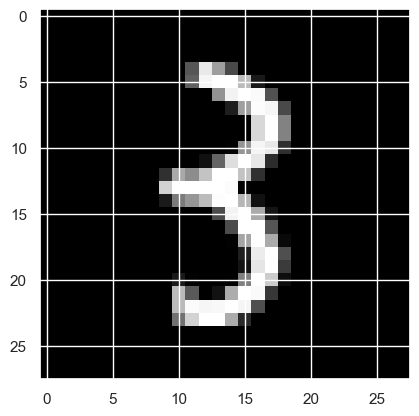

In [4]:
from keras.datasets import mnist

# Load the MNIST dataset.
(X_train_digits, Y_train_digits), (X_test_digits, Y_test_digits) = mnist.load_data()
X_train_digits = X_train_digits / 255
X_test_digits = X_test_digits / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_digits = Y_train_digits.flatten()
Y_test_digits = Y_test_digits.flatten()

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_digits.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_digits = X_train_digits[shuffled_indices]
Y_train_digits = Y_train_digits[shuffled_indices]

# Show the first training example.
print('Label: %d' %Y_train_digits[0])
plt.imshow(X_train_digits[0], cmap='gray')
plt.show()

## Build a Model

We will write a build_model function that allows for a range of experiments on both datasets.

---
### Exercise 1 (58points)

Fill in code that implements the build_model function, including all the arguments listed in the function definition.

In [28]:
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  # YOUR CODE HERE
  model = tf.keras.Sequential()
  
  # input layer
  #model.add(tf.keras.Input(shape=(28,), name = 'Input'))
  model.add(tf.keras.layers.Flatten())
  
  # hidden layer  
  for index in hidden_layer_sizes:
        model.add(tf.keras.layers.Dense(units=index, 
                                        activation=activation, 
                                        name='Hidden_'+ str(index)))
  
  # output layer 
  model.add(tf.keras.layers.Dense(units=n_classes, 
                                  activation='softmax', 
                                  name='Output'))
  
  
  if optimizer=='SGD':
    opt=tf.keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    opt=tf.keras.optimizers.Adam(learning_rate=learning_rate)
  
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=opt, metrics=['accuracy'])

  return model

---

## Run Experiments

We can now run a suite of experiments to see how the hyperparameters and layer sizes effect performance. The train_and_evaluate function below can be used to run experiments and retrieve results.

Training...


2022-10-24 21:53:25.067943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 21:53:28.349764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


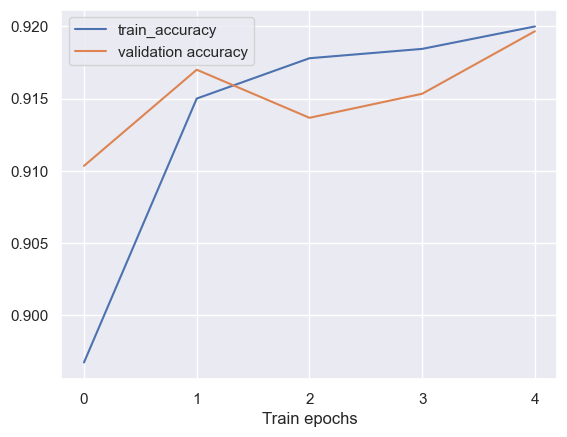

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Output (Dense)              (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
Test Accuracy: 0.9206


In [15]:
def train_and_evaluate(data='digits',
                       hidden_layer_sizes=[],
                       activation='tanh',
                       optimizer='Adam',
                       learning_rate=0.01,
                       num_epochs=5):

  # Build the model.
  model = build_model(n_classes=10,
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      learning_rate=learning_rate)

  # Select the dataset.
  if data == 'digits':
    X_train = X_train_digits
    X_test = X_test_digits
    Y_train = Y_train_digits
    Y_test = Y_test_digits
  elif data == 'fashion':
    X_train = X_train_fashion
    X_test = X_test_fashion
    Y_train = Y_train_fashion
    Y_test = Y_test_fashion
  else:
    raise 'Unsupported dataset: %s' %data

  # Train the model.
  print('Training...')
  history = model.fit(
    x=X_train,
    y=Y_train,
    epochs=num_epochs,
    batch_size=64,
    validation_split=0.1,
    verbose=0)

  # Retrieve the training metrics (after each train epoch) and the final test
  # accuracy.
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  plt.plot(train_accuracy, label='train_accuracy')
  plt.plot(val_accuracy, label='validation accuracy')
  plt.xticks(range(num_epochs))
  plt.xlabel('Train epochs')
  plt.legend()
  plt.show()

  test_accuracy = model.evaluate(x=X_test, y=Y_test, verbose=0,
                                 return_dict=True)['accuracy']
  
  print(model.summary())
  return test_accuracy

print('Test Accuracy: %1.4f' %train_and_evaluate())

---
### Exercise 2 (8 points)

Run experiments and fill in the test results in the table below. Feel free to extend the table to more experiments as you see fit.

Training...


2022-10-24 21:42:21.606265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 21:42:24.675197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


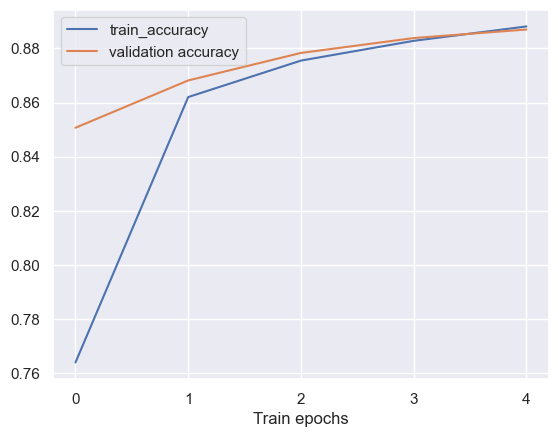

Test Accuracy: 0.8972


In [9]:
# multiple train and evaluate
model_1 = train_and_evaluate(data='digits',
                             hidden_layer_sizes=[],
                             activation='tanh',
                             optimizer='SGD',
                             learning_rate=0.01,
                             num_epochs=5)


Training...


2022-10-24 21:54:47.058263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 21:54:50.054802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


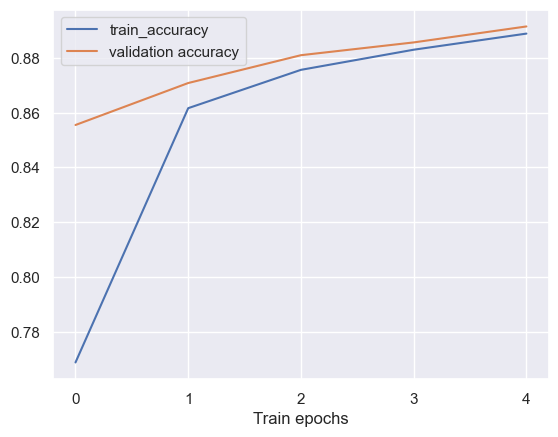

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Output (Dense)              (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
Test Accuracy: 0.8958


In [17]:
model_2 = train_and_evaluate(data='digits',
                             hidden_layer_sizes=[],
                             activation='relu',
                             optimizer='SGD',
                             learning_rate=0.01,
                             num_epochs=5)
print('Test Accuracy: %1.4f' %model_2)

Training...


2022-10-24 21:55:28.695424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 21:55:31.882028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


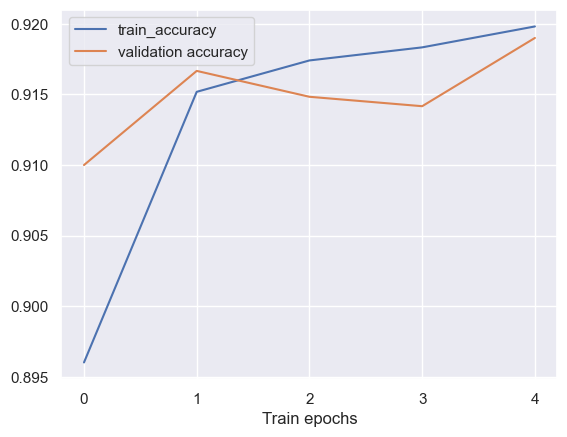

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Output (Dense)              (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
Test Accuracy: 0.9216


In [18]:
model_3 = train_and_evaluate(data='digits',
                             hidden_layer_sizes=[],
                             activation='relu',
                             optimizer='Adam',
                             learning_rate=0.01,
                             num_epochs=5)
print('Test Accuracy: %1.4f' %model_3)

Training...


2022-10-24 21:56:32.165850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 21:56:35.438263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


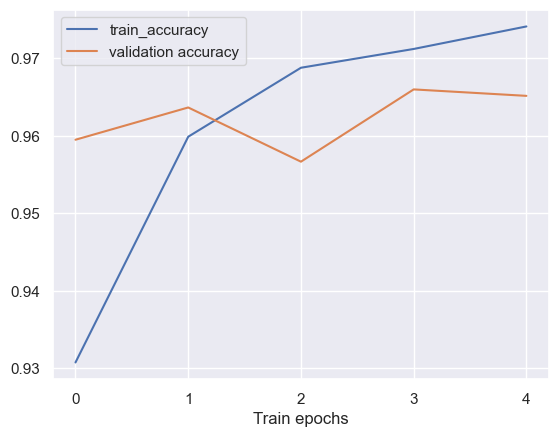

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden (Dense)              (None, 128)               100480    
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Test Accuracy: 0.9648


In [19]:
model_4 = train_and_evaluate(data='digits',
                             hidden_layer_sizes=[128],
                             activation='relu',
                             optimizer='Adam',
                             learning_rate=0.01,
                             num_epochs=5)
print('Test Accuracy: %1.4f' %model_4)

Training...


2022-10-25 06:47:09.699131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-25 06:47:13.315704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


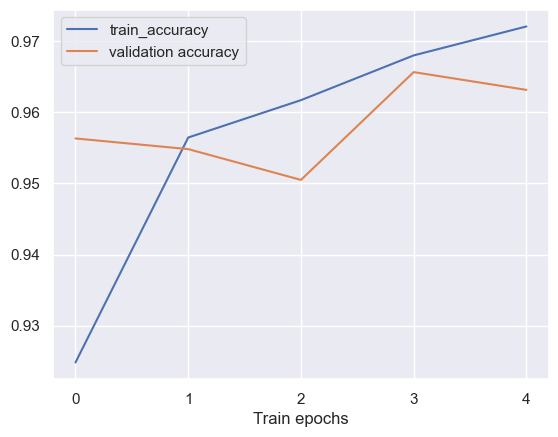

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden_256 (Dense)          (None, 256)               200960    
                                                                 
 Hidden_128 (Dense)          (None, 128)               32896     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None
Test Accuracy: 0.9644


In [29]:
model_5 = train_and_evaluate(data='digits',
                             hidden_layer_sizes=[256,128],
                             activation='relu',
                             optimizer='Adam',
                             learning_rate=0.01,
                             num_epochs=5)
print('Test Accuracy: %1.4f' %model_5)

Training...


2022-10-25 06:51:15.212957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-25 06:51:18.052570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


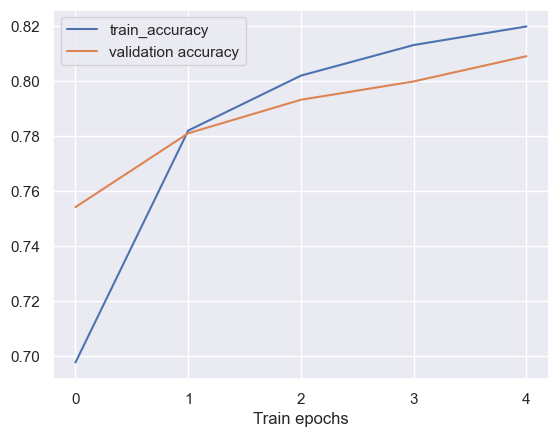

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Output (Dense)              (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
Test Accuracy: 0.8109


In [30]:
model_6 = train_and_evaluate(data='fashion',
                             hidden_layer_sizes=[],
                             activation='tanh',
                             optimizer='SGD',
                             learning_rate=0.01,
                             num_epochs=5)
print('Test Accuracy: %1.4f' %model_6)

Training...


2022-10-25 06:52:17.456909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-25 06:52:20.595628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


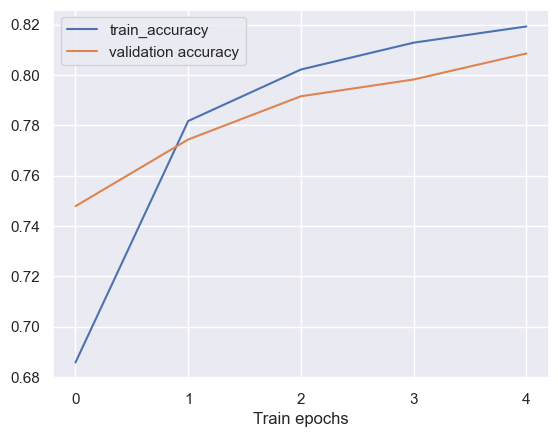

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Output (Dense)              (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
Test Accuracy: 0.8097


In [31]:
model_7 = train_and_evaluate(data='fashion',
                             hidden_layer_sizes=[],
                             activation='relu',
                             optimizer='SGD',
                             learning_rate=0.01,
                             num_epochs=5)
print('Test Accuracy: %1.4f' %model_7)

Training...


2022-10-25 06:55:05.051589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-25 06:55:08.091789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


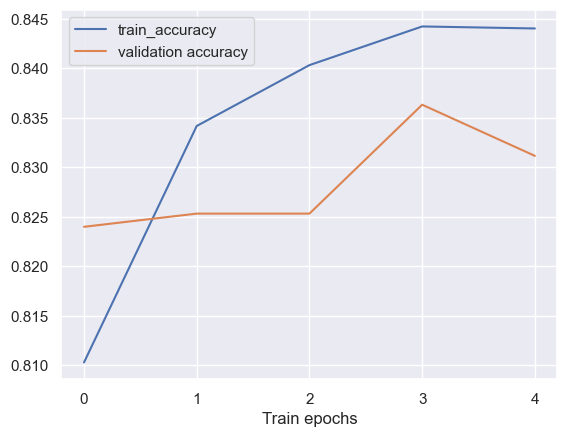

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Output (Dense)              (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
Test Accuracy: 0.8353


In [32]:
model_8 = train_and_evaluate(data='fashion',
                             hidden_layer_sizes=[],
                             activation='relu',
                             optimizer='Adam',
                             learning_rate=0.01,
                             num_epochs=5)
print('Test Accuracy: %1.4f' %model_8)

Training...


2022-10-25 06:56:10.237092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-25 06:56:13.124485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


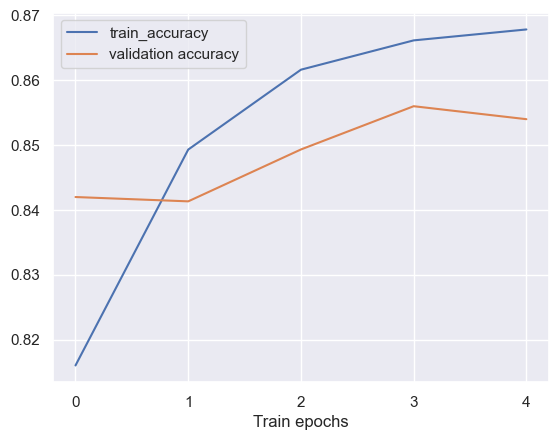

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden_128 (Dense)          (None, 128)               100480    
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Test Accuracy: 0.8490


In [33]:
model_9 = train_and_evaluate(data='fashion',
                             hidden_layer_sizes=[128],
                             activation='relu',
                             optimizer='Adam',
                             learning_rate=0.01,
                             num_epochs=5)
print('Test Accuracy: %1.4f' %model_9)

Training...


2022-10-25 06:57:19.085996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-25 06:57:22.546104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


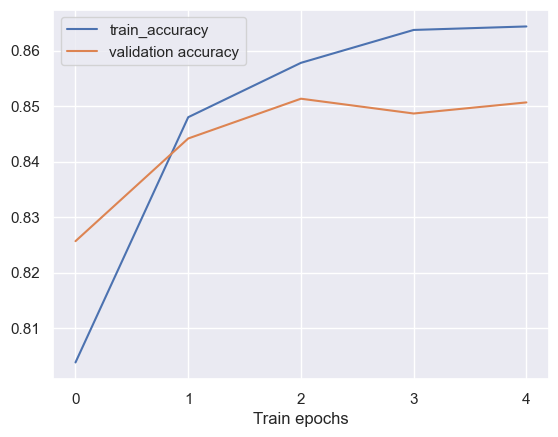

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden_256 (Dense)          (None, 256)               200960    
                                                                 
 Hidden_128 (Dense)          (None, 128)               32896     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None
Test Accuracy: 0.8423


In [34]:
model_10 = train_and_evaluate(data='fashion',
                             hidden_layer_sizes=[256,128],
                             activation='relu',
                             optimizer='Adam',
                             learning_rate=0.01,
                             num_epochs=5)
print('Test Accuracy: %1.4f' %model_10)

#### Student Solution

DATA | HIDDEN SIZES | ACTIVATION | OPTIMIZER | LEARNING RATE | #PARAMETERS | TEST ACCURACY
-|-|-|-|-|-|-
digits|[]|tanh|SGD|0.01|7850|0.8972||
digits|[]|relu|SGD|0.01|7850|0.8958||
digits|[]|relu|Adam|0.01|7850|0.9216||
digits|[128]|relu|Adam|0.01|101770|0.9648||
digits|[256,128]|relu|Adam|0.01|235146|0.9644||
-
fashion|[]|tanh|SGD|0.01|7850|0.8109||
fashion|[]|relu|SGD|0.01|7850|0.8097||
fashion|[]|relu|Adam|0.01|7850|0.8353||
fashion|[128]|relu|Adam|0.01|101770|0.8490||
fashion|[256,128]|relu|Adam|0.01|235146|0.8423||
